In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv(r"C:\Users\USER\Documents\historical_data.csv")

In [3]:
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [5]:
#converting datatime to pd datatype
data['created_at'] = pd.to_datetime(data['created_at'])
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [7]:
data.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


 ## Feature Creation 

In [8]:
 #creating the target variable
from datetime import datetime 
data['actual_delivery_duration'] = (data['actual_delivery_time'] - data['created_at'])

In [9]:
data['actual_delivery_duration']

0        0 days 01:02:59
1        0 days 01:07:04
2        0 days 00:29:41
3        0 days 00:51:15
4        0 days 00:39:50
               ...      
197423   0 days 01:05:07
197424   0 days 00:56:23
197425   0 days 00:50:08
197426   0 days 01:05:07
197427   0 days 00:37:08
Name: actual_delivery_duration, Length: 197428, dtype: timedelta64[ns]

In [10]:
data['actual_delivery_duration'] = data['actual_delivery_duration'].astype('timedelta64[s]')

In [11]:
data['busy_dashers_percentage'] = data['total_busy_dashers'] / data['total_onshift_dashers']

In [12]:
data['available_dashers'] = data['total_onshift_dashers'] - data['total_busy_dashers']

In [13]:
data['non_preparation_duration'] = data['estimated_store_to_consumer_driving_duration'] + data['estimated_order_place_duration']

In [14]:
data['market_id']

0         1.0
1         2.0
2         3.0
3         3.0
4         3.0
         ... 
197423    1.0
197424    1.0
197425    1.0
197426    1.0
197427    1.0
Name: market_id, Length: 197428, dtype: float64

In [16]:
order_protocol_dummies = pd.get_dummies(data.order_protocol)
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')

In [17]:
market_id_dummies = pd.get_dummies(data.market_id)
market_id_dummies = market_id_dummies.add_prefix('market_id_')

In [18]:
#imputing missing store_id values with the most frequently occuring ones 
#we start by mapping store_ids to the primary category feature since we have too many unique store ids
unique_store_ids = data['store_id'].unique().tolist()
store_id_category_mappings = {store_id : data[data.store_id == store_id].store_primary_category.mode() 
                              for store_id in unique_store_ids}

In [19]:
#we create a function to impute NAN values with the most frequent category values 
def fill(store_id):
    try:
        return store_id_category_mappings[store_id].values[0]
    except:
        return np.nan 
data['nan_free_store_primary_category'] = data.store_id.apply(fill)

In [26]:
store_id = data['store_id'].iloc[0]
store_id_category_mappings[store_id].values[0]

'american'

In [27]:
store_primary_category_dummies = pd.get_dummies(data.nan_free_store_primary_category)
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category')

In [28]:
train_df = data.drop(columns=[
    'created_at','market_id','store_id','store_primary_category','actual_delivery_time','nan_free_store_primary_category','order_protocol',
])

In [29]:
train_df.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration',
       'actual_delivery_duration', 'busy_dashers_percentage',
       'available_dashers', 'non_preparation_duration'],
      dtype='object')

In [31]:
train_df = pd.concat([train_df,order_protocol_dummies,market_id_dummies,store_primary_category_dummies],axis=1)

In [32]:
train_df.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration',
       ...
       'categorysouthern', 'categoryspanish', 'categorysteak', 'categorysushi',
       'categorytapas', 'categorythai', 'categoryturkish', 'categoryvegan',
       'categoryvegetarian', 'categoryvietnamese'],
      dtype='object', length=101)

In [33]:
train_df = train_df.astype('float32')

In [34]:
train_df.head(5)

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,categorysouthern,categoryspanish,categorysteak,categorysushi,categorytapas,categorythai,categoryturkish,categoryvegan,categoryvegetarian,categoryvietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
np.where(np.any(~np.isfinite(train_df),axis=0) ==True)

(array([ 5,  6,  7,  9, 10, 11, 12, 13], dtype=int64),)

In [36]:
train_df.replace([np.inf,-np.inf],np.nan,inplace=True)
train_df.dropna(inplace=True)

In [37]:
train_df.shape

(177070, 101)

<AxesSubplot:>

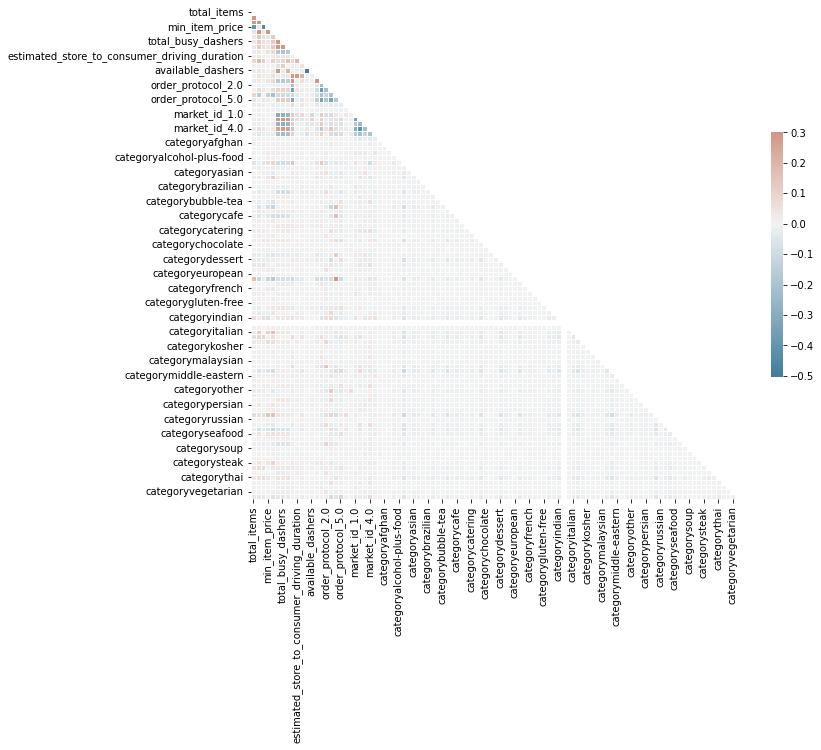

In [39]:
corr = train_df.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 23, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidth=.5, cbar_kws={'shrink':.5}
           )



In [41]:
train_df['categoryindonesian'].describe()

count    177070.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: categoryindonesian, dtype: float64

In [53]:
def find_redundant_pairs(df):
    """find diagonal and lower triangular pairs of the correlation matrix"""
    pairs_to_drop = set()
    columns = df.columns
    for i in range(len(columns)):
        for j in range(0,i+1):
            pairs_to_drop.add((columns[i],columns[j]))
    return pairs_to_drop
            

In [54]:
def get_top_correlations(df,n=5):
    abs_corr = df.corr().abs().unstack()
    labels_to_drop = find_redundant_pairs(df)
    abs_corr = abs_corr.drop(labels=labels_to_drop).sort_values(ascending=False) 
    return abs_corr[:n]

In [80]:
print(get_top_correlations(train_df,20))

estimated_order_place_duration  order_protocol_1.0    0.897649
total_items                     num_distinct_items    0.758153
subtotal                        num_distinct_items    0.682892
total_items                     subtotal              0.557181
min_item_price                  max_item_price        0.541239
subtotal                        max_item_price        0.507949
busy_dashers_percentage         available_dashers     0.502969
order_protocol_4.0              categoryfast          0.489986
num_distinct_items              min_item_price        0.446735
total_items                     min_item_price        0.389280
order_protocol_1.0              order_protocol_3.0    0.373582
estimated_order_place_duration  order_protocol_3.0    0.364171
order_protocol_1.0              order_protocol_5.0    0.342341
estimated_order_place_duration  order_protocol_5.0    0.333288
order_protocol_3.0              order_protocol_5.0    0.332530
order_protocol_1.0              order_protocol_2.0    0

In [56]:
train_df = data.drop(columns=['created_at','market_id','store_id','store_primary_category','actual_delivery_duration',
                             'nan_free_store_primary_category','order_protocol'])
                    

In [57]:
train_df = pd.concat([train_df,order_protocol_dummies,store_primary_category_dummies],axis=1)

In [60]:
train_df = train_df.drop(columns=['total_onshift_dashers','total_busy_dashers',
                                  'categoryindonesian','non_preparation_duration',]
                        )

In [76]:
train_df = train_df.drop(columns=['actual_delivery_time'])

In [77]:
train_df = train_df.astype('float32')
train_df.replace([np.inf,-np.inf],np.nan,inplace=True)

In [79]:
train_df.dropna(inplace=True)
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,busy_dashers_percentage,available_dashers,...,categorysouthern,categoryspanish,categorysteak,categorysushi,categorytapas,categorythai,categoryturkish,categoryvegan,categoryvegetarian,categoryvietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,0.424242,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,2.000000,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
print(get_top_correlations(train_df,20))

estimated_order_place_duration  order_protocol_1.0    0.897649
total_items                     num_distinct_items    0.758153
subtotal                        num_distinct_items    0.682892
total_items                     subtotal              0.557181
min_item_price                  max_item_price        0.541239
subtotal                        max_item_price        0.507949
busy_dashers_percentage         available_dashers     0.502969
order_protocol_4.0              categoryfast          0.489986
num_distinct_items              min_item_price        0.446735
total_items                     min_item_price        0.389280
order_protocol_1.0              order_protocol_3.0    0.373582
estimated_order_place_duration  order_protocol_3.0    0.364171
order_protocol_1.0              order_protocol_5.0    0.342341
estimated_order_place_duration  order_protocol_5.0    0.333288
order_protocol_3.0              order_protocol_5.0    0.332530
order_protocol_1.0              order_protocol_2.0    0

In [109]:
train_df = data.drop(columns=['created_at','market_id','store_id','store_primary_category','actual_delivery_time',
                             'nan_free_store_primary_category','order_protocol'])

train_df = pd.concat([train_df,store_primary_category_dummies],axis=1)
train_df = train_df.drop(columns=['total_onshift_dashers','total_busy_dashers',
                                  'categoryindonesian','actual_delivery_time','non_preparation_duration',]
                        )
train_df = train_df.astype('float32')
train_df.replace([np.inf,-np.inf],np.nan,inplace=True)
train_df.dropna(inplace=True)
train_df.head()

KeyError: "['actual_delivery_time'] not found in axis"

In [83]:
print(get_top_correlations(train_df,20))

total_items                     num_distinct_items                0.758153
subtotal                        num_distinct_items                0.682892
total_items                     subtotal                          0.557181
min_item_price                  max_item_price                    0.541239
subtotal                        max_item_price                    0.507949
busy_dashers_percentage         available_dashers                 0.502969
num_distinct_items              min_item_price                    0.446735
total_items                     min_item_price                    0.389280
total_outstanding_orders        available_dashers                 0.200826
                                estimated_order_place_duration    0.171010
total_items                     categoryfast                      0.170968
max_item_price                  categoryitalian                   0.169774
                                categoryfast                      0.166186
                         

## Feature Engineering 


In [85]:
#new features 
train_df['percent_distinct_item_of_total'] = train_df['num_distinct_items'] / train_df['total_items']
train_df['avg_price_per_item'] = train_df['subtotal'] / train_df['total_items'] 
train_df.drop(columns=['num_distinct_items','subtotal'],inplace=True)
print('Top correlations')
print(get_top_correlations(train_df,20))

Top correlations
min_item_price                  avg_price_per_item                0.860581
max_item_price                  avg_price_per_item                0.770380
min_item_price                  max_item_price                    0.541239
busy_dashers_percentage         available_dashers                 0.502969
total_items                     percent_distinct_item_of_total    0.445763
                                min_item_price                    0.389280
                                avg_price_per_item                0.310765
percent_distinct_item_of_total  avg_price_per_item                0.226718
categorypizza                   avg_price_per_item                0.225507
total_outstanding_orders        available_dashers                 0.200826
max_item_price                  percent_distinct_item_of_total    0.178017
categoryfast                    avg_price_per_item                0.175971
min_item_price                  percent_distinct_item_of_total    0.173534
total_ou

In [86]:
train_df['price_range_of_item'] = train_df['max_item_price'] - train_df['min_item_price'] 
train_df.drop(columns=['max_item_price','min_item_price'],inplace=True)
print('top correlations')
print(get_top_correlations(train_df,20))

top correlations
busy_dashers_percentage         available_dashers                 0.502969
total_items                     percent_distinct_item_of_total    0.445763
                                price_range_of_item               0.333309
                                avg_price_per_item                0.310765
percent_distinct_item_of_total  avg_price_per_item                0.226718
categorypizza                   avg_price_per_item                0.225507
total_outstanding_orders        available_dashers                 0.200826
categoryfast                    avg_price_per_item                0.175971
total_outstanding_orders        estimated_order_place_duration    0.171010
total_items                     categoryfast                      0.170968
categoryitalian                 avg_price_per_item                0.158193
categoryfast                    percent_distinct_item_of_total    0.153581
estimated_order_place_duration  categoryamerican                  0.150171
category

In [88]:
%pip install statsmodels



[notice] A new release of pip available: 22.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
def compute_vif(features):
    '''compute vif score'''
    vif_data = pd.DataFrame()
    vif_data['feature'] = features 
    vif_data['vif'] = [variance_inflation_factor(train_df[features].values,i) for i in range(len(features))]
    return vif_data.sort_values(by=['vif']).reset_index(drop=True)

In [103]:
features = train_df.columns.to_list()
vif_data = compute_vif(features)
vif_data

,feature,vif
0,categoryalcohol-plus-food,1.000374
1,categorychocolate,1.000508
2,categorybelgian,1.000761
3,categoryrussian,1.003302
4,categoryafrican,1.004002
...,...,...
77,categoryamerican,7.155219
78,estimated_store_to_consumer_driving_duration,7.213114
79,busy_dashers_percentage,8.615907
80,estimated_order_place_duration,13.477831


In [104]:
multi_col = True 
while multi_col:
    highest_vif_feature = vif_data['feature'].values.tolist()[-1]
    print(' removing ..' , highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data = compute_vif(features)
    multi_col = False if len(vif_data[vif_data.vif > 20]) == 0 else True 


 removing .. percent_distinct_item_of_total


In [106]:
selected_features = vif_data['feature'].values.tolist()
vif_data

,feature,vif
0,categoryalcohol-plus-food,1.000227
1,categorychocolate,1.000384
2,categorybelgian,1.000466
3,categoryrussian,1.002111
4,categorygluten-free,1.002459
...,...,...
76,categoryamerican,4.661199
77,avg_price_per_item,5.959905
78,estimated_store_to_consumer_driving_duration,7.195294
79,busy_dashers_percentage,8.593102


## Feature selection

In [108]:
# applying random forest regression to find gini's importance 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x = train_df[selected_features]
y= train_df['actual_delivery_duration']
x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42)

KeyError: 'actual_delivery_duration'

In [ ]:
feature_names = [f"feature